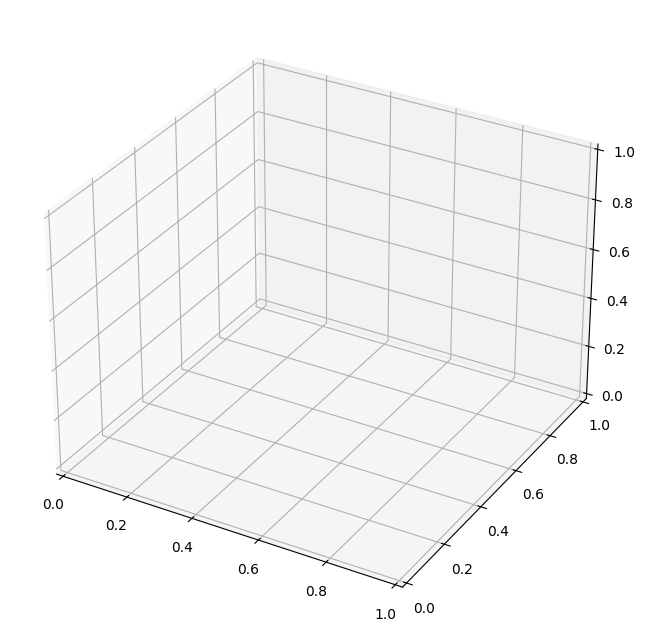

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random

# Parameters
grid_size = (20, 20, 20)  # 3D grid dimensions
initial_cells = 10
iterations = 30

# Initialize the 3D grid
grid = np.zeros(grid_size, dtype=int)

# Randomly seed initial cells
for _ in range(initial_cells):
    x, y, z = random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1), random.randint(0, grid_size[2] - 1)
    grid[x, y, z] = 1

# Migration function
def migrate_3d(grid):
    new_grid = grid.copy()
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            for z in range(grid.shape[2]):
                if grid[x, y, z] == 1:  # If there's a cell
                    neighbors = [
                        (x+1, y, z), (x-1, y, z), (x, y+1, z), (x, y-1, z), (x, y, z+1), (x, y, z-1)
                    ]
                    random.shuffle(neighbors)
                    for nx, ny, nz in neighbors:
                        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and 0 <= nz < grid.shape[2]:
                            if new_grid[nx, ny, nz] == 0:  # Move to empty position
                                new_grid[nx, ny, nz] = 1
                                new_grid[x, y, z] = 0
                                break
    return new_grid

# Proliferation function
def proliferate_3d(grid):
    new_grid = grid.copy()
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            for z in range(grid.shape[2]):
                if grid[x, y, z] == 1:
                    neighbors = [
                        (x+1, y, z), (x-1, y, z), (x, y+1, z), (x, y-1, z), (x, y, z+1), (x, y, z-1)
                    ]
                    random.shuffle(neighbors)
                    for nx, ny, nz in neighbors:
                        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and 0 <= nz < grid.shape[2]:
                            if new_grid[nx, ny, nz] == 0:
                                new_grid[nx, ny, nz] = 1
                                break
    return new_grid

# Run simulation and store grids
grids = []
for _ in range(iterations):
    grid = migrate_3d(grid)
    grid = proliferate_3d(grid)
    grids.append(grid.copy())

# Animation setup
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()
    x, y, z = np.where(grids[frame] == 1)
    ax.scatter(x, y, z, c='green', marker='o')
    ax.set_title(f"Iteration {frame}")
    ax.set_xlim(0, grid_size[0])
    ax.set_ylim(0, grid_size[1])
    ax.set_zlim(0, grid_size[2])
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")

anim = FuncAnimation(fig, update, frames=len(grids), repeat=False)
plt.show()
anim.save('cell_simulation3D.mp4', writer='ffmpeg')



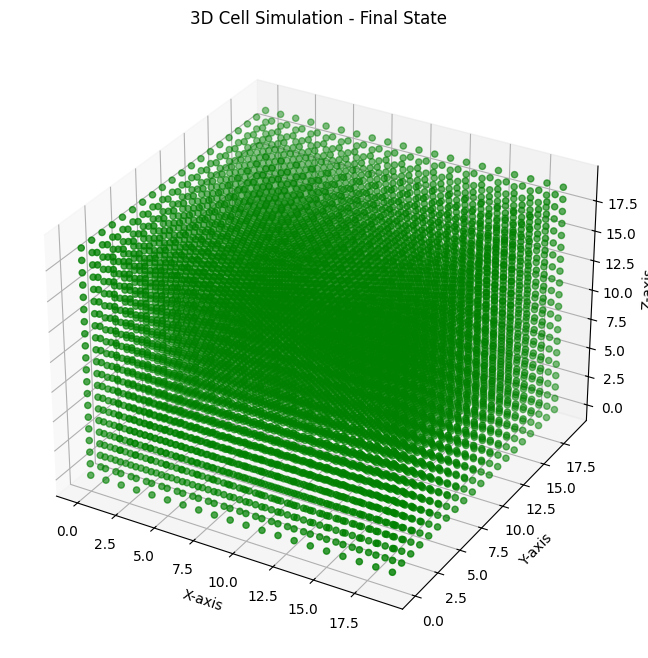

In [3]:
# Final state visualization with interactivity
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the final grid state
x, y, z = np.where(grid == 1)
sc = ax.scatter(x, y, z, c='green', marker='o')

ax.set_title("3D Cell Simulation - Final State")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.show()


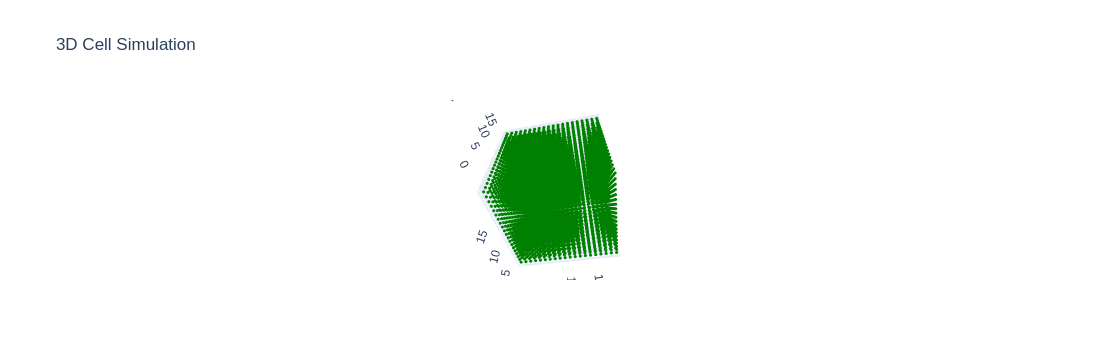

In [7]:
import plotly.graph_objects as go

# Extract positions
x, y, z = np.where(grid == 1)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=1, color='green'))])

fig.update_layout(title="3D Cell Simulation", scene=dict(
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    zaxis_title="Z-axis"
))

fig.show()
